In [13]:
import os
os.environ["KAGGLE_CONFIG_DIR"]="C:/Users/manav/.kaggle/"

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [15]:
!kaggle datasets download uwrfkaggler/ravdess-emotional-speech-audio -p ../data/raw

Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
License(s): CC-BY-NC-SA-4.0




  0%|          | 0.00/429M [00:00<?, ?B/s]
 32%|███▏      | 136M/429M [00:00<00:00, 1.42GB/s]
 63%|██████▎   | 272M/429M [00:00<00:00, 1.14GB/s]
 89%|████████▉ | 384M/429M [00:00<00:00, 790MB/s] 
100%|██████████| 429M/429M [00:00<00:00, 854MB/s]


In [17]:
import zipfile

zip_path = "../data/raw/ravdess-emotional-speech-audio.zip"
with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall("../data/raw")

In [19]:
audio_files = glob('../data/raw/kaggle_speech/*/*.wav')

In [20]:
ipd.Audio(audio_files[0])

In [27]:
y, sr = librosa.load(audio_files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')


y: [ 5.3765390e-08 -2.1233145e-08 -6.0478342e-09  3.8985988e-08
 -7.6543131e-08  1.1907758e-07 -1.6708444e-07  2.2135782e-07
 -2.8319053e-07  3.5470680e-07]
shape y: (72838,)
sr: 22050


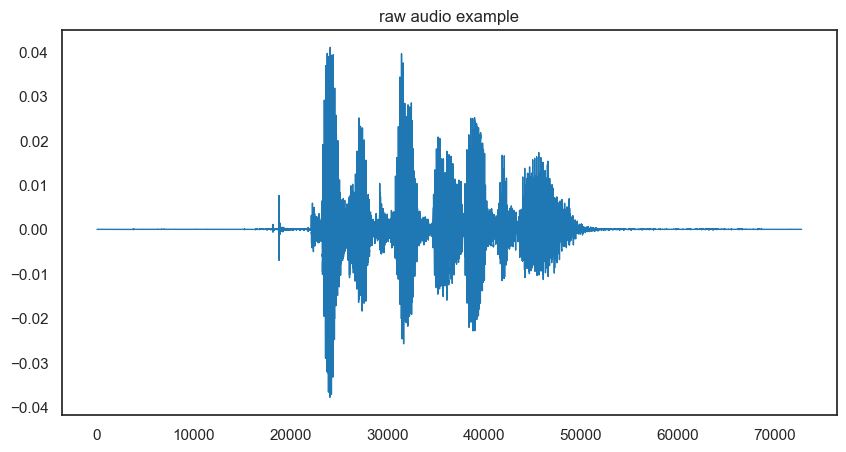

In [30]:
pd.Series(y).plot(figsize=(10,5), lw=1, title='raw audio example')
plt.show()

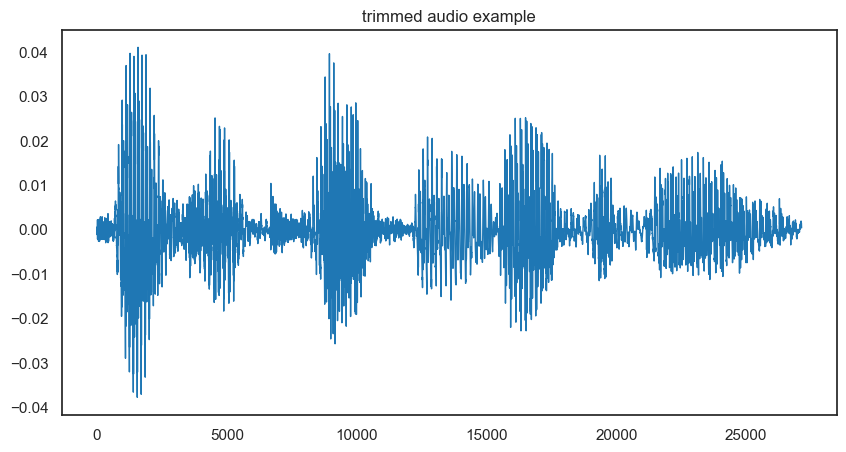

In [37]:
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10,5), lw=1, title='trimmed audio example')
plt.show()

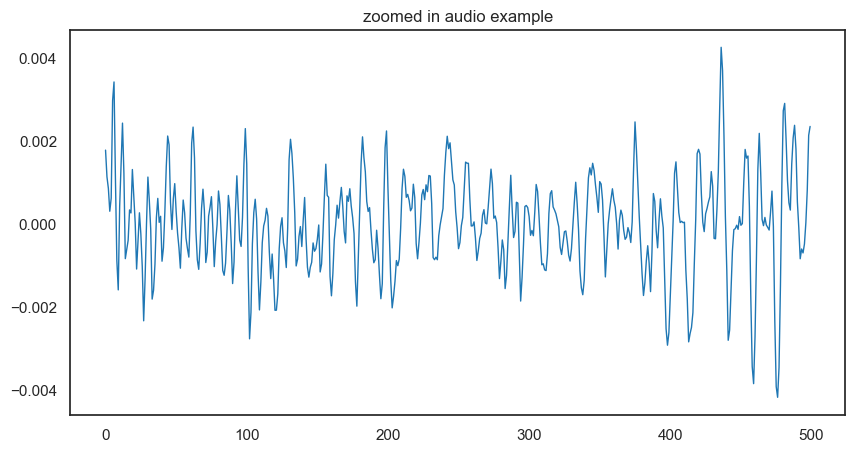

In [42]:
pd.Series(y[30000:30500]).plot(figsize=(10,5), lw=1, title='zoomed in audio example')
plt.show()

In [44]:
# Fourier Transform
D=librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 143)

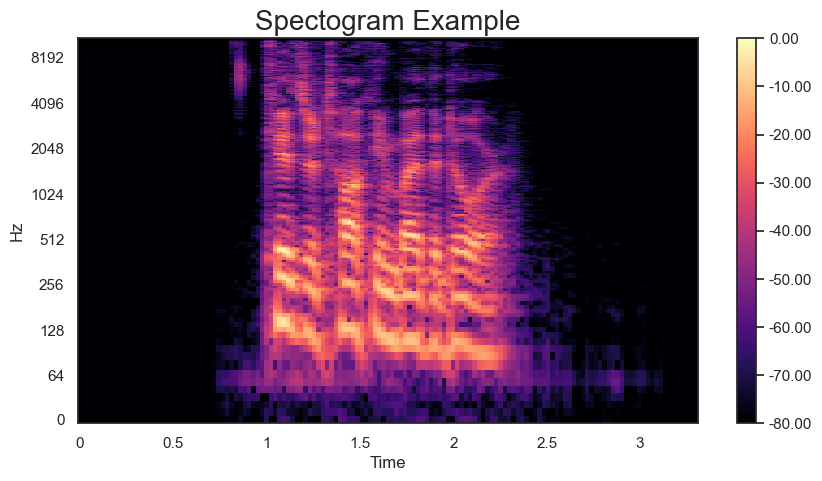

In [46]:
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [57]:
# Mel Spectogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128*2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

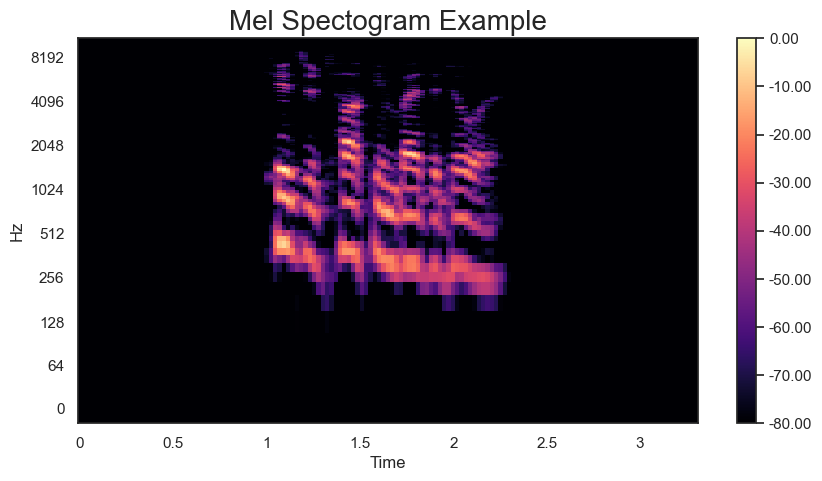

In [58]:
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()